In [1]:
#These are the libraries you can use.  You may add any libraries directy related to threading if this is a direction
#you wish to go (this is not from the course, so it's entirely on you if you wish to use threading).  Any
#further libraries you wish to use you must email me, james@uwaterloo.ca, for permission.

from IPython.display import display, Math, Latex

import pandas as pd
import numpy as np
import numpy_financial as npf
import yfinance as yf
import matplotlib.pyplot as plt
import random
from datetime import datetime

## Group Assignment
### Team Number: XX
### Team Member Names:
### Team Strategy Chosen: __________(Market Beat or Market Meet)

Disclose any use of AI for this assignment below (detail where and how you used it).  Please see the course outline for acceptable uses of AI.


## Contribution Declaration

The following team members made a meaningful contribution to this assignment:

Insert Names Here.

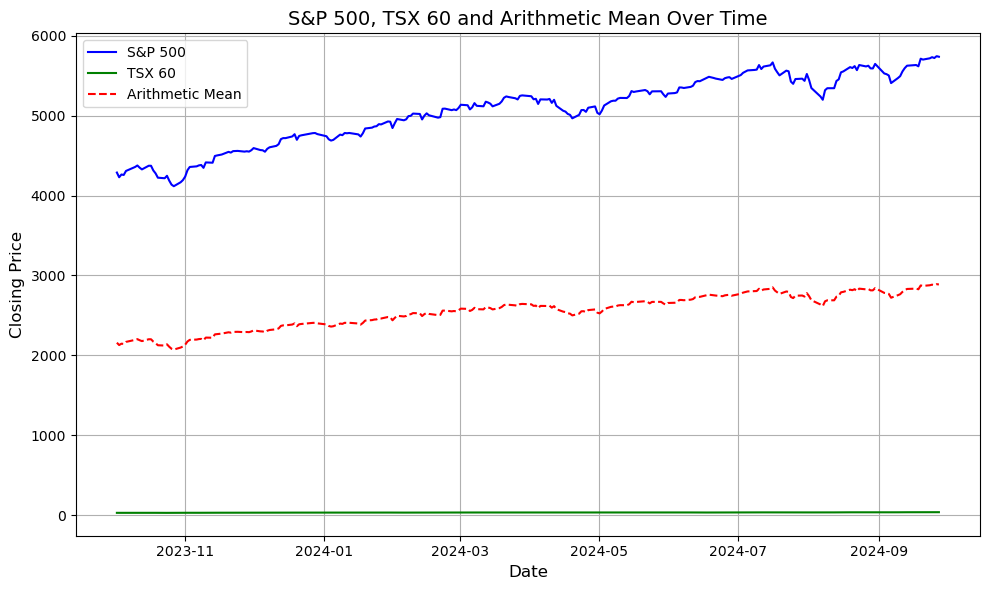

In [71]:
start_date = "2023-10-01"
end_date = "2024-09-30"

# Fetch historical data for both indices
sp500 = yf.Ticker("^GSPC").history(start=start_date, end=end_date)['Close']
tsx60 = yf.Ticker("XIU.TO").history(start=start_date, end=end_date)['Close']

sp500.index = pd.to_datetime(sp500.index)
tsx60.index = pd.to_datetime(tsx60.index)

# Ensure both dataframes align by date (in case they have missing values)
combined_data = pd.concat([sp500, tsx60], axis=1, keys=['S&P 500', 'TSX 60'])
combined_data = combined_data.dropna()  # Remove any rows with missing data

# Calculate the arithmetic mean for each day
combined_data['Arithmetic Mean'] = combined_data.mean(axis=1)

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot the closing prices of both indices
plt.plot(combined_data.index, combined_data['S&P 500'], label='S&P 500', color='blue')
plt.plot(combined_data.index, combined_data['TSX 60'], label='TSX 60', color='green')

# Plot the arithmetic mean
plt.plot(combined_data.index, combined_data['Arithmetic Mean'], label='Arithmetic Mean', color='red', linestyle='--')

# Labels and title
plt.title('S&P 500, TSX 60 and Arithmetic Mean Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)

# Show legend
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [73]:
def get_stock_correlations(tickers, combined):
    correlations = {}
    
    # Download stock data for each ticker
    for ticker in tickers:
        stock_data = yf.Ticker(ticker).history(start=start_date, end=end_date)["Close"]
        
        
        # Calculate the correlation with the average index values
        correlation = combined["Arithmetic Mean"].corr(stock_data)
        correlations[ticker] = correlation
    
    return correlations

# Load your CSV file (make sure it has a column "Ticker" with stock tickers)
tickers_df = pd.read_csv("Tickers_Example.csv")
ticker_list = list(tickers_df.iloc[:,0])
correlations = get_stock_correlations(ticker_list,combined_data)
print(correlations)

$AGN: possibly delisted; no timezone found
$CELG: possibly delisted; no timezone found
$MON: possibly delisted; no timezone found
$RTN: possibly delisted; no timezone found


{'ABBV': 0.853362683320413, 'ABT': 0.5726662547168515, 'ACN': 0.081725700309841, 'AGN': nan, 'AIG': 0.8809575931498065, 'AMZN': 0.9237109792737154, 'AXP': 0.9708010059809308, 'BA': -0.5342484131482601, 'BAC': 0.9649868844871767, 'BB.TO': -0.8652290329136838, 'BIIB': -0.6856955662569234, 'BK': 0.955869446134655, 'BLK': 0.8775685083050109, 'BMY': -0.5003699912777464, 'C': 0.9386744859579448, 'CAT': 0.8772460296881012, 'CELG': nan, 'CL': 0.947694610436492, 'KO': 0.870897619223359, 'LLY': 0.9515284335344619, 'LMT': 0.6742492281734248, 'MO': 0.821474613259749, 'MON': nan, 'MRK': 0.715062675022566, 'PEP': 0.6564190887489744, 'PFE': -0.06963390470170402, 'PG': 0.9094394389291262, 'PM': 0.7584395941704377, 'PYPL': 0.710789250505815, 'QCOM': 0.8670235607865394, 'RTN': nan, 'RY.TO': 0.9412146776182527, 'SHOP.TO': 0.27383398908233375, 'T.TO': -0.21029963230197724, 'TD.TO': 0.17059757495860892, 'TXN': 0.9287027719072505, 'UNH': 0.1941440800016876, 'UNP': 0.6837457018050219, 'UPS': -0.5050973642993

In [75]:
correlations_clean = {key: value for key, value in correlations.items() if not np.isnan(value)}

# Sort the dictionary by values in descending order and print the keys with their values
sorted_items = sorted(correlations_clean.items(), key=lambda item: item[1], reverse=True)

# Print the sorted keys and values
for key, value in sorted_items:
    print(f"{key}: {value}")

AXP: 0.9708010059809308
BAC: 0.9649868844871767
BK: 0.955869446134655
LLY: 0.9515284335344619
CL: 0.947694610436492
RY.TO: 0.9412146776182527
C: 0.9386744859579448
TXN: 0.9287027719072505
AMZN: 0.9237109792737154
PG: 0.9094394389291262
AIG: 0.8809575931498065
BLK: 0.8775685083050109
CAT: 0.8772460296881012
KO: 0.870897619223359
QCOM: 0.8670235607865394
ABBV: 0.853362683320413
MO: 0.821474613259749
USB: 0.8024727919291216
PM: 0.7584395941704377
MRK: 0.715062675022566
PYPL: 0.710789250505815
UNP: 0.6837457018050219
LMT: 0.6742492281734248
PEP: 0.6564190887489744
ABT: 0.5726662547168515
SHOP.TO: 0.27383398908233375
UNH: 0.1941440800016876
TD.TO: 0.17059757495860892
ACN: 0.081725700309841
PFE: -0.06963390470170402
T.TO: -0.21029963230197724
BMY: -0.5003699912777464
UPS: -0.5050973642993553
BA: -0.5342484131482601
BIIB: -0.6856955662569234
BB.TO: -0.8652290329136838


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

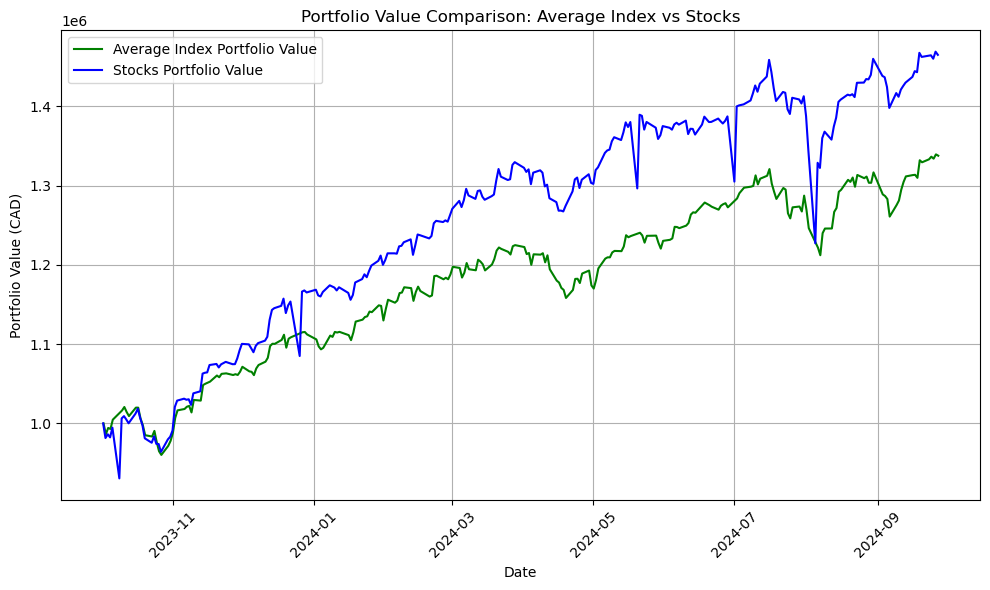

In [77]:
# Assuming 'top_15_stocks' is the dictionary of top 15 stocks with their correlations to the average index
top_15_stocks = dict(sorted(correlations_clean.items(), key=lambda item: item[1], reverse=True)[:15])

# Total portfolio value
total_investment = 1000000  # in CAD

# Calculate the investment per stock (equal investment)
investment_per_stock = total_investment / len(top_15_stocks)
portfolio_values = pd.DataFrame()

# Loop through each stock in the top 15 list
for ticker in top_15_stocks:
    # Fetch historical stock data
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    
    # Adjust stock data to CAD if it's in USD (you may need conversion if your stocks are USD)
    if stock_data['Close'].iloc[0] < 10:  # If prices are very low, assume they are in USD
        stock_data['Close'] *= 1.35  # Conversion rate to CAD for USD stocks (adjust as needed)
    
    # Calculate the number of shares purchased for this stock
    shares_purchased = investment_per_stock / stock_data['Close'].iloc[0]  # Initial purchase price

    # Add a new column for portfolio value based on shares purchased
    stock_data[f'{ticker}_portfolio_value'] = stock_data['Close'] * shares_purchased
    
    # Add this stock's portfolio value to the overall portfolio
    portfolio_values[ticker] = stock_data[f'{ticker}_portfolio_value']

# Sum the portfolio values of all 15 stocks for the total portfolio value
portfolio_values['Total_Portfolio_Value'] = portfolio_values.sum(axis=1)

# Print the final portfolio value DataFrame
#print(portfolio_values)
total_investment_index = 1000000  # in CAD

# Assume 'combined' DataFrame has the 'Arithmetic Mean' column with the index prices
# Calculate the number of shares purchased based on the first row of the 'Arithmetic Mean'
shares_purchased_index = total_investment_index / combined_data['Arithmetic Mean'].iloc[0]

# Create a new column for the portfolio value over time
combined_data['Portfolio_Value_Index'] = combined_data['Arithmetic Mean'] * shares_purchased_index

plt.figure(figsize=(10, 6))

# Plot portfolio value for the average index
plt.plot(combined_data.index, combined_data['Portfolio_Value_Index'], label='Average Index Portfolio Value', color='green')

# Plot portfolio value for the stocks portfolio
plt.plot(portfolio_values.index, portfolio_values['Total_Portfolio_Value'], label='Stocks Portfolio Value', color='blue')

# Set the title and labels
plt.title('Portfolio Value Comparison: Average Index vs Stocks')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (CAD)')

# Show the legend
plt.legend()

# Show grid and format the x-axis labels
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()